In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# PHASE 1: Setup & Initial EDA

# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
file_path = "/content/drive/MyDrive/Datasets/treadmill_models.csv"
df = pd.read_csv(file_path)

# Step 3: View basic structure
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
##

Dataset Shape: (180, 9)

Data Types:
 Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

First 5 Rows:
   Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [3]:
# Step 4: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
#


Missing Values:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [4]:
# Step 5: Statistical summary for numerical columns
print("\nNumeric Summary:\n", df.describe())
##


Numeric Summary:
               Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


In [5]:
# Step 6: Summary for categorical columns
print("\nCategorical Summary:\n", df.describe(include='object'))

# Step 7: Convert categorical columns to 'category' type
cat_cols = ['Product', 'Gender', 'MaritalStatus']
for col in cat_cols:
    df[col] = df[col].astype('category')
##


Categorical Summary:
        Product Gender MaritalStatus
count      180    180           180
unique       3      2             2
top      KP281   Male     Partnered
freq        80    104           107


In [6]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()
##

,count
Product,
KP281,80
KP481,60
KP781,40


In [7]:
# Number of Male and Female customers
df['Gender'].value_counts()
##

,count
Gender,
Male,104
Female,76


In [8]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()
##

,count
MaritalStatus,
Partnered,107
Single,73


In [9]:
# Total number of unique Product ids
df['Product'].nunique()
##

3

In [10]:
# unique list of product ids
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [11]:

# The diversity of data provided
df.nunique()
##

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [12]:
# Step 8: Verify updated data types
print("\nUpdated Data Types:\n", df.dtypes)


Updated Data Types:
 Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


In [13]:
# Optional for cleaner plots
sns.set(style="whitegrid")

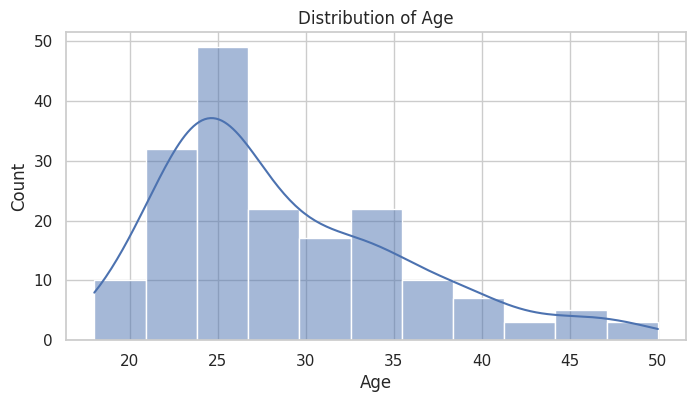

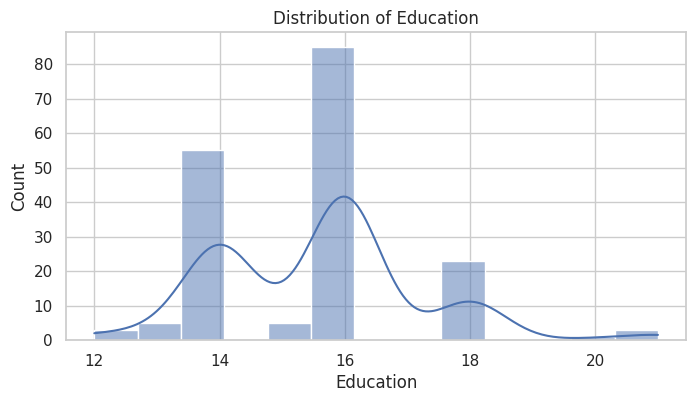

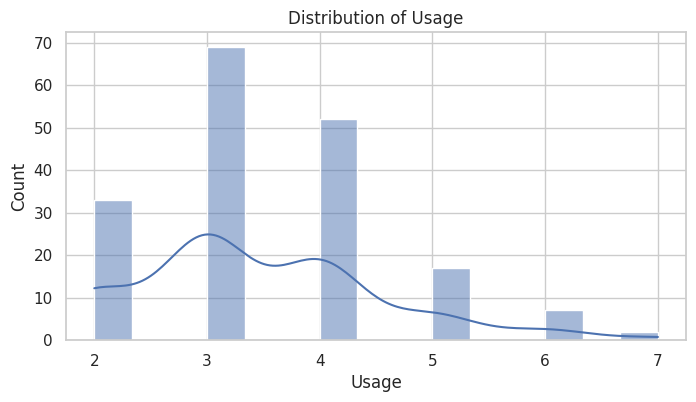

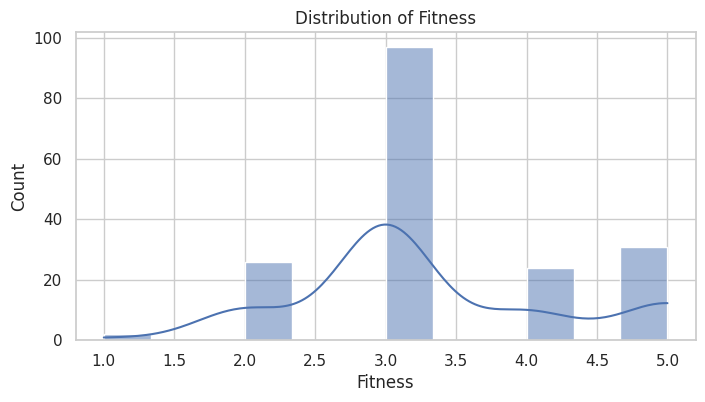

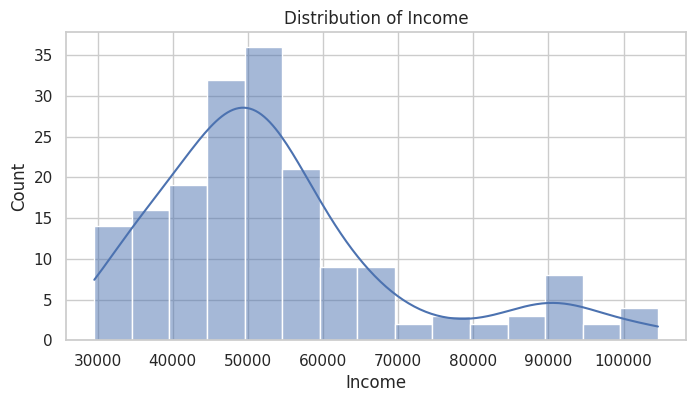

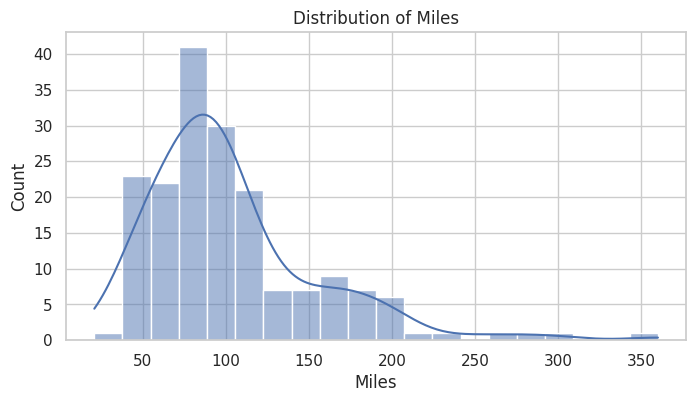

In [14]:
# Univariate: Continuous Variables
continuous_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


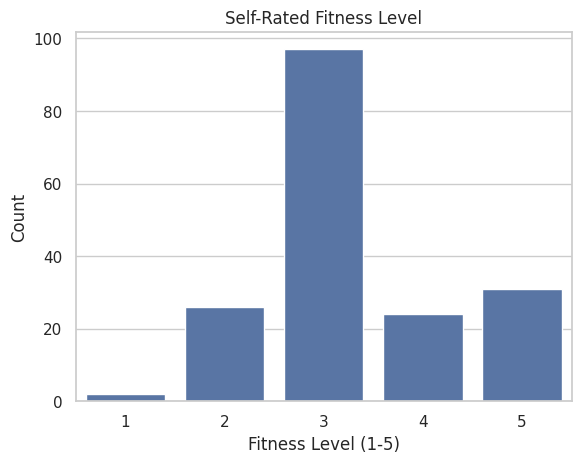

In [15]:
sns.countplot(data=df, x='Fitness')
plt.title('Self-Rated Fitness Level')
plt.xlabel('Fitness Level (1-5)')
plt.ylabel('Count')
plt.show()


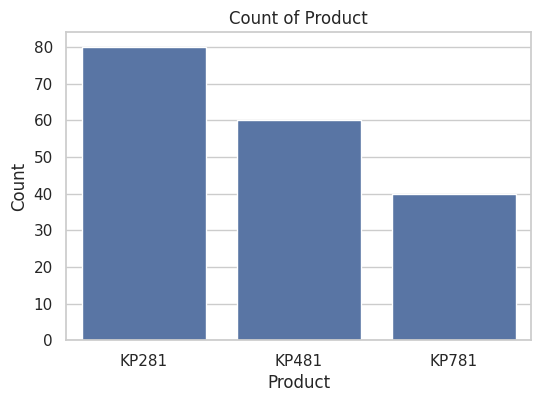

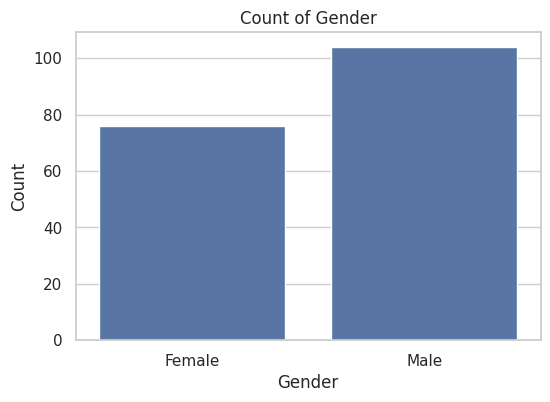

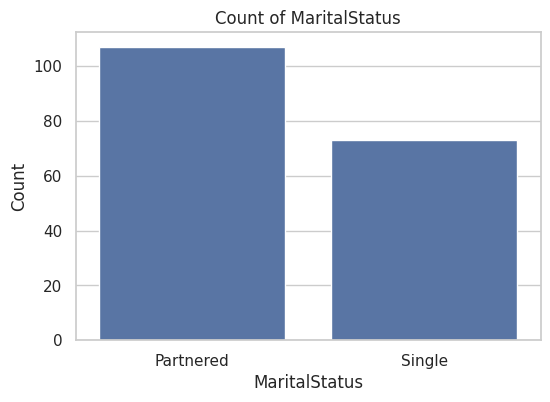

In [16]:
# Univariate: Categorical Variables
categorical_cols = ['Product', 'Gender', 'MaritalStatus']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
##

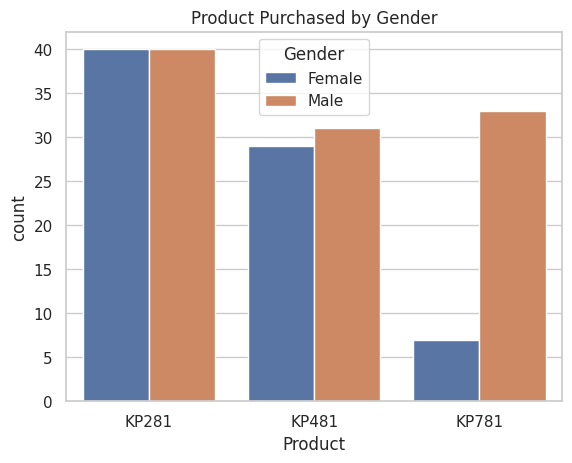

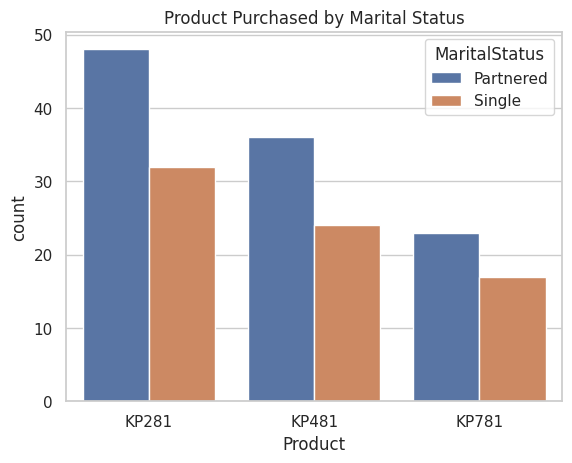

In [17]:
# Product vs Gender
sns.countplot(x='Product', hue='Gender', data=df)
plt.title('Product Purchased by Gender')
plt.show()

# Product vs Marital Status
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Product Purchased by Marital Status')
plt.show()
##

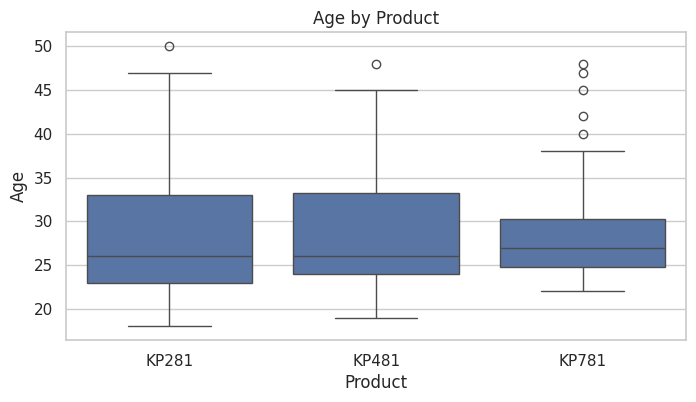

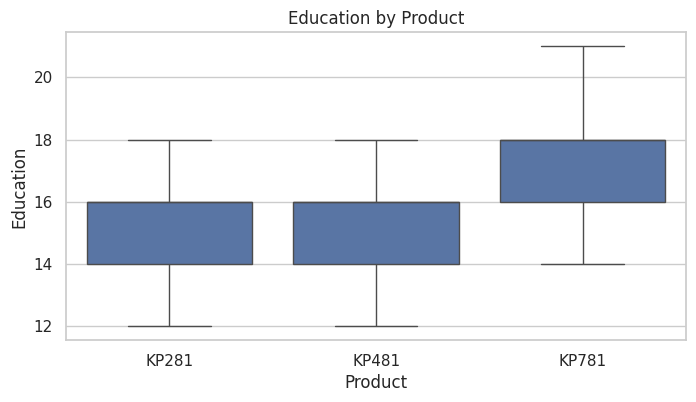

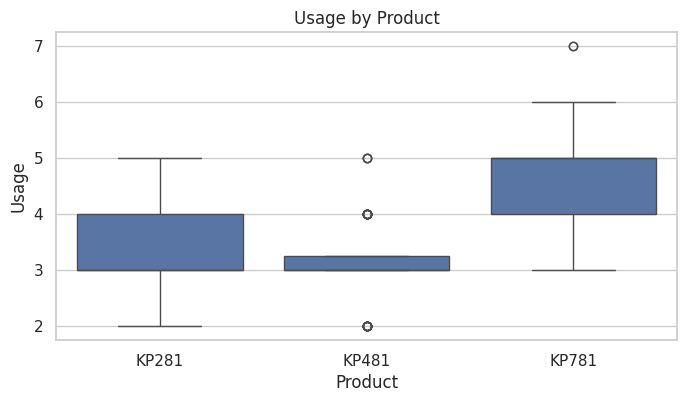

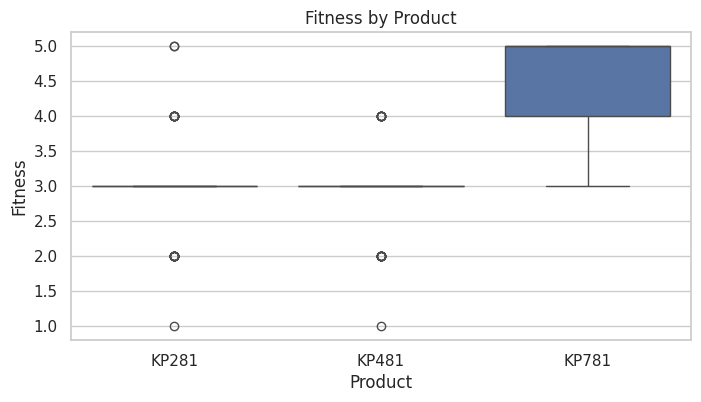

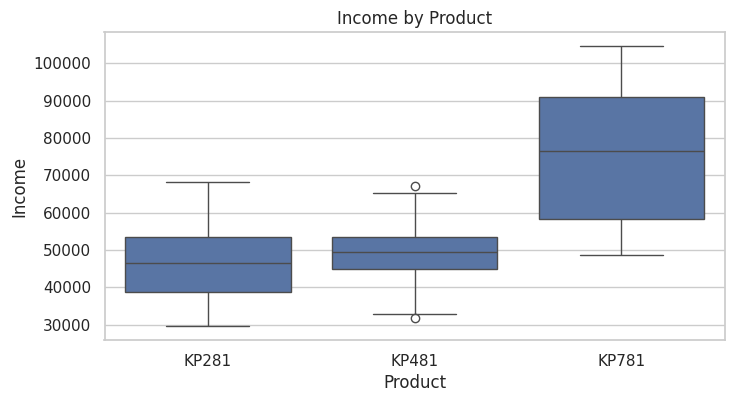

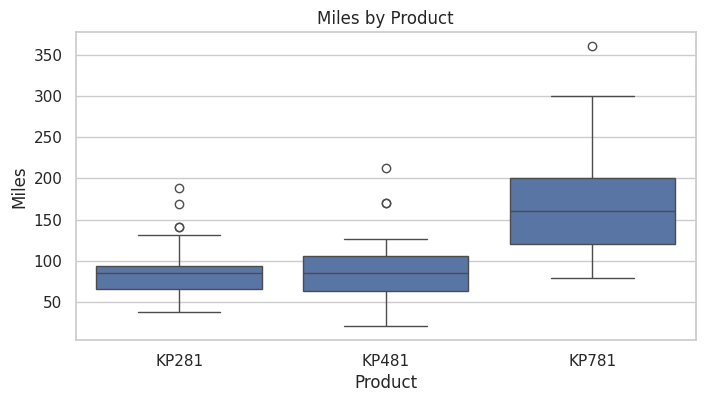

In [18]:
# Product vs Continuous Variables
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Product', y=col, data=df)
    plt.title(f'{col} by Product')
    plt.show()
    ##

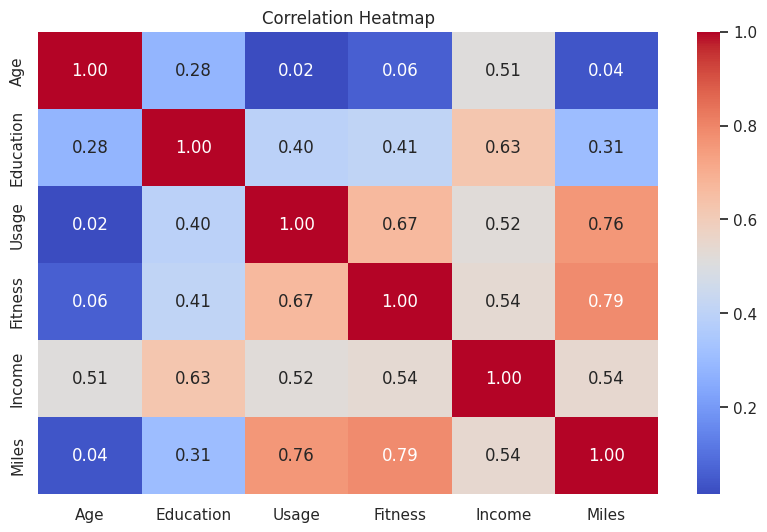

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

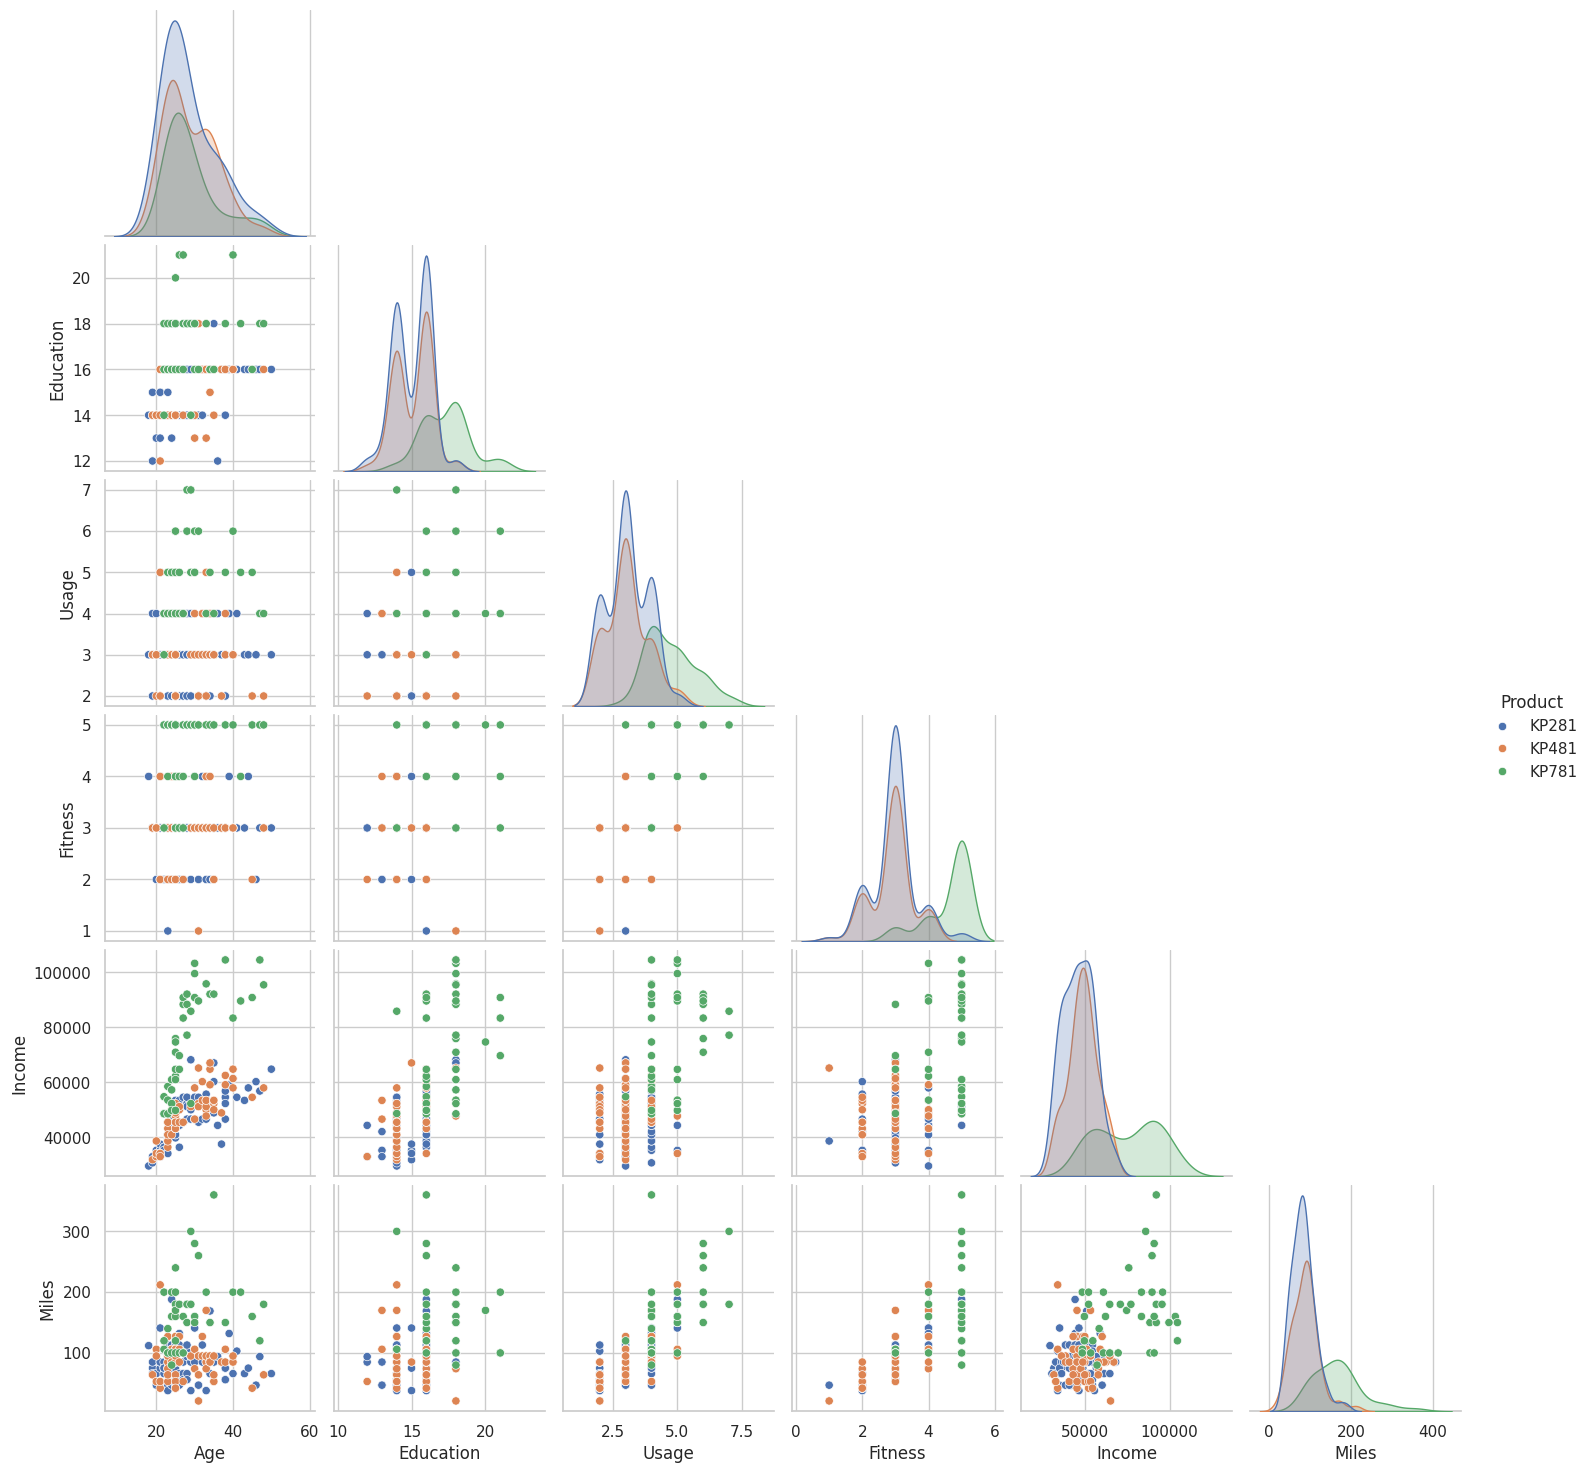

In [20]:
# Pairplot for numeric features
sns.pairplot(df, hue="Product", corner=True)
plt.show()

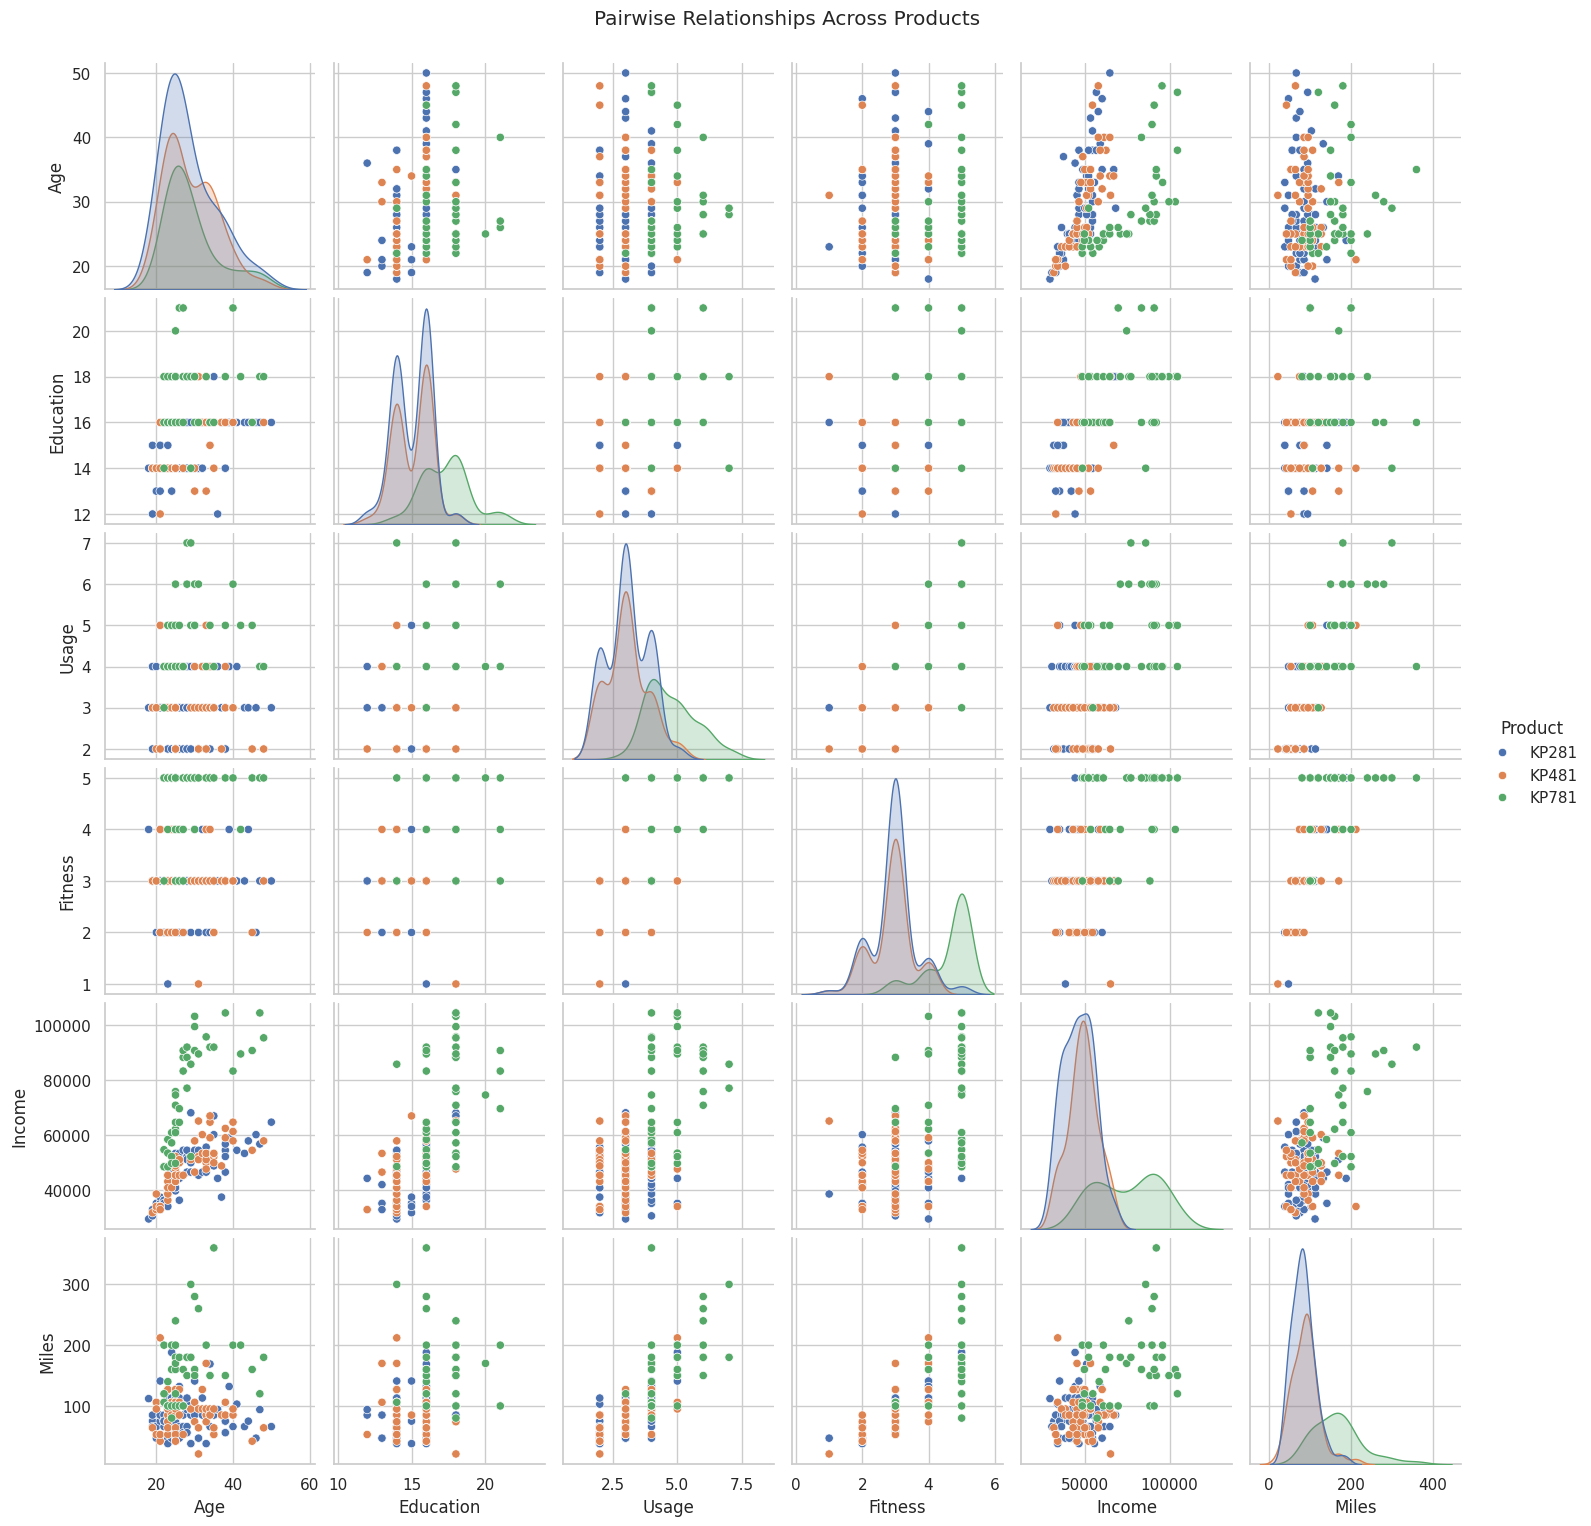

In [21]:
sns.pairplot(df, hue='Product', diag_kind='kde')
plt.suptitle('Pairwise Relationships Across Products', y=1.02)
plt.show()

In [22]:
# Marginal probability (simple % distribution of products)
product_counts = df['Product'].value_counts(normalize=True) * 100
print("Marginal Probability of Products (%):\n", product_counts)

Marginal Probability of Products (%):
 Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64


In [23]:
# Create a contingency table: Product vs Gender
gender_product = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
print("\nConditional Probability (Product given Gender):\n", gender_product)


Conditional Probability (Product given Gender):
 Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769


In [24]:
# Contingency table: Product vs Marital Status
marital_product = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index') * 100
print("\nConditional Probability (Product given Marital Status):\n", marital_product)


Conditional Probability (Product given Marital Status):
 Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860  21.495327
Single         43.835616  32.876712  23.287671


In [25]:
# Customer profile summary by Product
profile_summary = df.groupby('Product', observed=True).agg({
    'Age': 'mean',
    'Education': 'mean',
    'Usage': 'mean',
    'Fitness': 'mean',
    'Income': 'mean',
    'Miles': 'mean'
}).round(2)

print("Customer Profile Summary by Product:\n", profile_summary)

Customer Profile Summary by Product:
            Age  Education  Usage  Fitness    Income   Miles
Product                                                    
KP281    28.55      15.04   3.09     2.96  46418.02   82.79
KP481    28.90      15.12   3.07     2.90  48973.65   87.93
KP781    29.10      17.32   4.78     4.62  75441.58  166.90


In [26]:
# Gender distribution by product
gender_dist = pd.crosstab(df['Product'], df['Gender'], normalize='index') * 100
print("\nGender Distribution by Product (%):\n", gender_dist)

# Marital status distribution by product
marital_dist = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index') * 100
print("\nMarital Status Distribution by Product (%):\n", marital_dist)


Gender Distribution by Product (%):
 Gender      Female       Male
Product                      
KP281    50.000000  50.000000
KP481    48.333333  51.666667
KP781    17.500000  82.500000

Marital Status Distribution by Product (%):
 MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5
